# Portfolio Optimization and Analysis

#### Imports

In [92]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

#### Get Quandl private key

In [94]:
quandl_private_key = open('private/quandlKey.txt', 'r').read()

#### Period of the analysis

In [95]:
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2018-12-22')

#### Create the portfolio

In [49]:
portfolio_list = ['SPTL', 'THOMASCOOK', 'TATAMTRDVR', 'ASHIANA']

In [50]:
portfolio_close_price = pd.DataFrame()

for stock in portfolio_list:
    portfolio_close_price[stock] = quandl.get("NSE/{}.5".format(stock), authtoken=quandl_private_key, start_date=start_date, end_date=end_date)['Close']

In [51]:
portfolio_close_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 340 entries, 2017-08-08 to 2018-12-21
Data columns (total 4 columns):
SPTL          340 non-null float64
THOMASCOOK    340 non-null float64
TATAMTRDVR    340 non-null float64
ASHIANA       340 non-null float64
dtypes: float64(4)
memory usage: 13.3 KB


In [52]:
portfolio_close_price.describe()

,SPTL,THOMASCOOK,TATAMTRDVR,ASHIANA
count,340.000000,340.000000,340.000000,340.000000
mean,60.089118,248.061765,182.644706,155.623382
std,26.042453,21.683914,50.753493,21.115043
min,21.500000,194.950000,85.900000,116.100000
25%,37.750000,233.887500,142.312500,135.500000
50%,58.575000,244.725000,190.225000,160.375000
75%,80.712500,269.300000,228.375000,172.650000
max,123.500000,292.150000,259.650000,199.500000


In [53]:
portfolio_close_price.head()

,SPTL,THOMASCOOK,TATAMTRDVR,ASHIANA
Date,,,,
2017-08-08,123.50,223.90,248.45,187.55
2017-08-09,117.35,223.50,242.25,185.25
2017-08-10,111.50,221.15,221.45,179.10
2017-08-11,105.95,219.75,223.20,172.15
2017-08-14,107.60,218.60,226.45,171.75


In [97]:
portfolio_close_price.to_csv('portfolio_close.csv')

#### Normalize Prices
This is the same as cumulative daily returns

In [55]:
portfolio_close_price_normalized = portfolio_close_price.copy()

for stock in portfolio_close_price.columns:
    portfolio_close_price_normalized[stock] = portfolio_close_price[stock]/portfolio_close_price.iloc[0][stock]

In [56]:
portfolio_close_price_normalized.head()

,SPTL,THOMASCOOK,TATAMTRDVR,ASHIANA
Date,,,,
2017-08-08,1.000000,1.000000,1.000000,1.000000
2017-08-09,0.950202,0.998213,0.975045,0.987737
2017-08-10,0.902834,0.987718,0.891326,0.954945
2017-08-11,0.857895,0.981465,0.898370,0.917889
2017-08-14,0.871255,0.976329,0.911451,0.915756


In [57]:
portfolio_close_price_normalized.tail()

,SPTL,THOMASCOOK,TATAMTRDVR,ASHIANA
Date,,,,
2018-12-17,0.189069,1.058732,0.385389,0.628632
2018-12-18,0.197976,1.055605,0.386798,0.625433
2018-12-19,0.205668,1.053819,0.384786,0.620101
2018-12-20,0.203239,1.074364,0.388408,0.622767
2018-12-21,0.206883,1.071014,0.387603,0.619035


#### Allocations

In [98]:
#30% in Stock 1
#20% in Stock 2
#40% in Stock 3
#10% in Stock 4
allocation = [0.3,0.2,0.4,0.1]

In [60]:
portfolio_size = 1000000

In [61]:
portfolio_normalized_allocation = portfolio_close_price_normalized.copy()

allocation_index = 0

for stock in portfolio_close_price_normalized.columns:
    portfolio_normalized_allocation[stock] = portfolio_close_price_normalized[stock].apply(lambda normalized_return : normalized_return * allocation[allocation_index] * portfolio_size)
    allocation_index += 1

In [62]:
portfolio_normalized_allocation.head()

,SPTL,THOMASCOOK,TATAMTRDVR,ASHIANA
Date,,,,
2017-08-08,300000.000000,200000.000000,400000.000000,100000.000000
2017-08-09,285060.728745,199642.697633,390018.112296,98773.660357
2017-08-10,270850.202429,197543.546226,356530.489032,95494.534791
2017-08-11,257368.421053,196292.987941,359347.957335,91788.856305
2017-08-14,261376.518219,195265.743636,364580.398471,91575.579845


In [63]:
portfolio_normalized_allocation['Total Position'] = portfolio_normalized_allocation.sum(axis=1)

In [66]:
portfolio_normalized_allocation.tail()

,SPTL,THOMASCOOK,TATAMTRDVR,ASHIANA,Total Position
Date,,,,,
2018-12-17,56720.647773,211746.315319,154155.765748,62863.236470,485485.965311
2018-12-18,59392.712551,211121.036177,154719.259408,62543.321781,487776.329917
2018-12-19,61700.404858,210763.733810,153914.268464,62010.130632,488388.537764
2018-12-20,60971.659919,214872.711032,155363.252163,62276.726206,493484.349320
2018-12-21,62064.777328,214202.769093,155041.255786,61903.492402,493212.294609


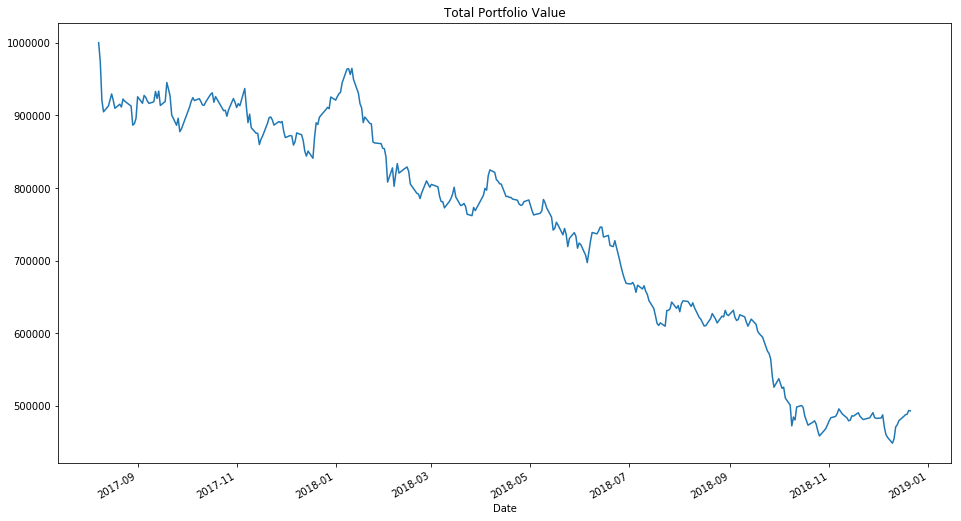

In [67]:
portfolio_normalized_allocation['Total Position'].plot(figsize=(16,9))
plt.title('Total Portfolio Value');

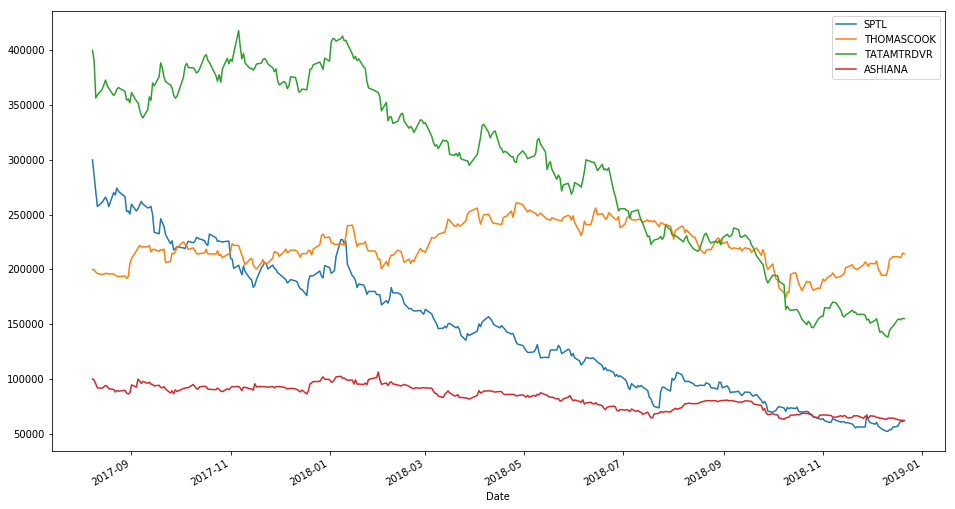

In [68]:
portfolio_normalized_allocation.drop('Total Position',axis=1).plot(kind='line', figsize=(16,9));

## Portfolio Statistics

#### Daily Returns

In [71]:
portfolio_normalized_allocation['Daily Return'] = portfolio_normalized_allocation['Total Position'].pct_change(1)

In [73]:
portfolio_normalized_allocation.head()

,SPTL,THOMASCOOK,TATAMTRDVR,ASHIANA,Total Position,Daily Return
Date,,,,,,
2017-08-08,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000,NaN
2017-08-09,285060.728745,199642.697633,390018.112296,98773.660357,973495.199031,-0.026505
2017-08-10,270850.202429,197543.546226,356530.489032,95494.534791,920418.772478,-0.054522
2017-08-11,257368.421053,196292.987941,359347.957335,91788.856305,904798.222634,-0.016971
2017-08-14,261376.518219,195265.743636,364580.398471,91575.579845,912798.240170,0.008842


In [76]:
#Overall Cumulative Return (not daily)
cumulative_return = 100 * (portfolio_normalized_allocation['Total Position'][-1]/portfolio_normalized_allocation['Total Position'][0] - 1 )
print('Our return was {}%!'.format(cumulative_return))

Our return was -50.678770539082095%!


#### Avg Daily Return

In [77]:
portfolio_normalized_allocation['Daily Return'].mean()

-0.001981606859180933

#### Standard Deviation of Daily Return

In [78]:
portfolio_normalized_allocation['Daily Return'].std()

0.014216978468434642

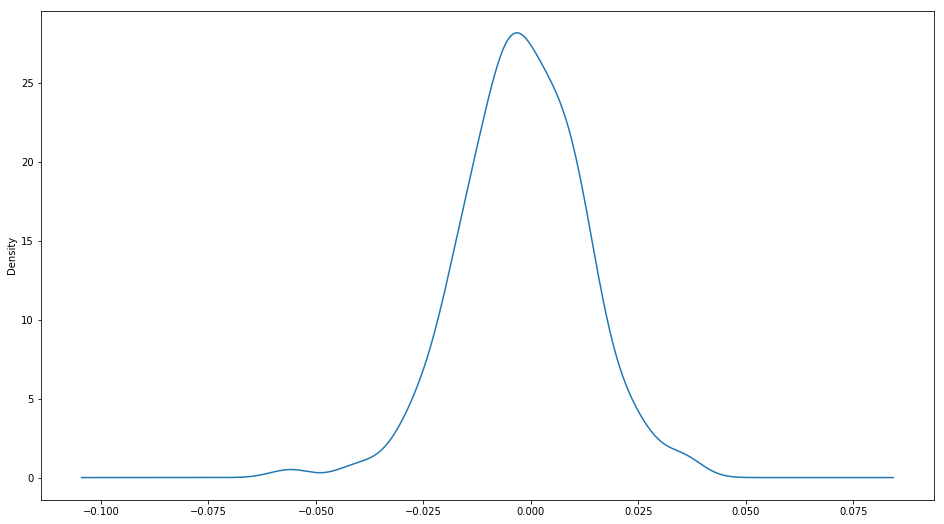

In [79]:
portfolio_normalized_allocation['Daily Return'].plot(kind='kde', figsize=(16,9));

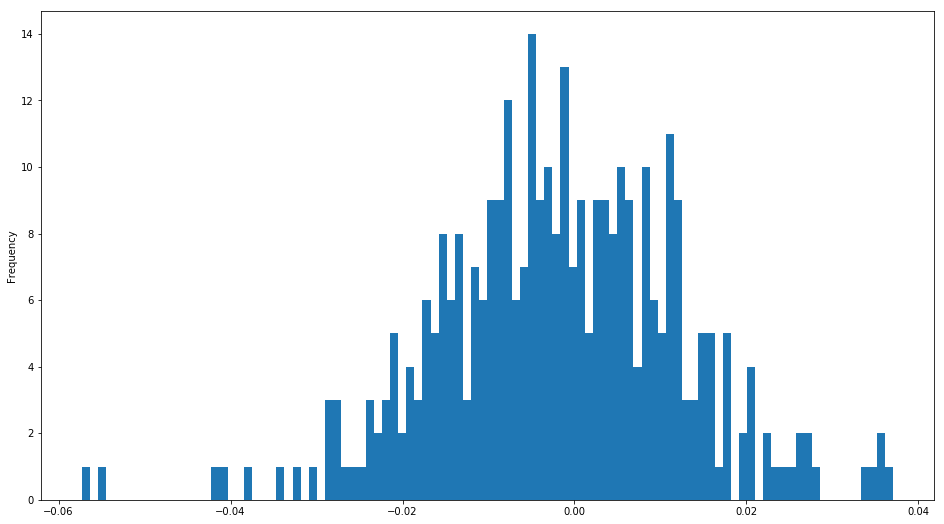

In [80]:
portfolio_normalized_allocation['Daily Return'].plot(kind='hist', bins=100, figsize=(16,9));

# Sharpe Ratio
The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

Daily = sqrt(252)
Weekly = sqrt(52)
Monthly = sqrt(12)

In [81]:
daily_rate = ((1.0 + 7)**(1/252))-1
daily_rate

0.008285891695374081

In [82]:
sharpe_ratio = (portfolio_normalized_allocation['Daily Return'].mean() - daily_rate) / portfolio_normalized_allocation['Daily Return'].std()

In [83]:
sharpe_ratio

-0.7221997682103486

In [84]:
# https://www.investopedia.com/articles/07/sharpe_ratio.asp
annualized_sharpe_ratio = (252**0.5)*sharpe_ratio
annualized_sharpe_ratio

-11.46456590155844

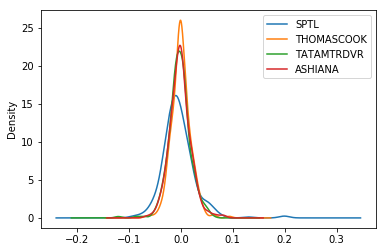

In [89]:
for stock in portfolio_close_price.columns:
    portfolio_close_price[stock].pct_change(1).plot('kde')
    plt.legend()